# Table of Content
- [Imports](#imports)
- [Resources](#resources)
- [Load Data Sets](#load-data-sets)
- [Consistency Checks - Customer Data](#consistency-checks---customer-data)
	- [Type checking](#type-checking)
	- [Check for missing values](#check-for-missing-values)
	- [Check for duplicates](#check-for-duplicates)
	- [Summary statistics](#summary-statistics)
- [Check accuracy - Customer Data](#check-accuracy---customer-data)
	- [Why is the max income so high?](#why-is-the-max-income-so-high?)
- [Data Privacy - Customer Data

First and last names are not need for the analysis and should be dropped](#data-privacy---customer-data

first-and-last-names-are-not-need-for-the-analysis-and-should-be-dropped)
- [Merge Data Sets](#merge-data-sets)
- [Export](#export)


## Imports [#](#table-of-content)

In [1]:
# standard library
from pathlib import Path

# 3rd party libraries
import numpy as np
import pandas as pd

# user-defined libraries
import da_helper as da

## Resources [#](#table-of-content)

In [2]:
# project folder
project_folder = Path(r"C:\Users\vynde\Desktop\CareerFoundry Data Analytics\Data Immersion - 4 Python Fundamentals for Data Analysts\Instacart_Basket_Analysis")

# resource folders
original_data_folder = project_folder / "02_Data" / "Original_Data"
prepared_data_folder = project_folder / "02_Data" / "Prepared_Data"

# input files
customers_data_file = original_data_folder / "customers.csv"
orders_products_merged_updated_v2_data_file = prepared_data_folder / "orders_products_merged_updated_v2.pkl"

# output files
orders_products_customers_merged_data_file = prepared_data_folder / "orders_products_customers_merged.pkl"

## Load Data Sets [#](#table-of-content)

Merged Data

In [3]:
df_ords_prods = pd.read_pickle(orders_products_merged_updated_v2_data_file)
df_ords_prods

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_label,busiest_day,busiest_period_of_day,max_order,loyalty_flag,avg_usr_prices,spending_flag,median_days_since_prior_order,order_freq_flag
0,2539329.0,1.0,1.0,2.0,8.0,0.0,196.0,1.0,0.0,Soda,...,9.0,Mid-range product,Regulary busy,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,9.0,Mid-range product,Least busy days,Fewest orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,9.0,Mid-range product,Least busy days,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,9.0,Mid-range product,Least busy days,Fewest orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,9.0,Mid-range product,Least busy days,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1320836.0,202557.0,17.0,2.0,15.0,1.0,43553.0,2.0,1.0,Orange Energy Shots,...,3.7,Low-range product,Regulary busy,Average orders,31.0,Regular customer,6.905655,Low spender,7.0,Frequent customer
32404855,31526.0,202557.0,18.0,5.0,11.0,3.0,43553.0,2.0,1.0,Orange Energy Shots,...,3.7,Low-range product,Regulary busy,Most orders,31.0,Regular customer,6.905655,Low spender,7.0,Frequent customer
32404856,758936.0,203436.0,1.0,2.0,7.0,0.0,42338.0,4.0,0.0,"Zucchini Chips, Pesto",...,6.9,Mid-range product,Regulary busy,Fewest orders,3.0,New customer,7.631579,Low spender,15.0,Regular customer
32404857,2745165.0,203436.0,2.0,3.0,5.0,15.0,42338.0,16.0,1.0,"Zucchini Chips, Pesto",...,6.9,Mid-range product,Least busy days,Fewest orders,3.0,New customer,7.631579,Low spender,15.0,Regular customer


Customer Data

In [4]:
df_custs = pd.read_csv(customers_data_file)
df_custs.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


## Consistency Checks - Customer Data [#](#table-of-content)

##### Type checking [#](#table-of-content)

In [5]:
df_custs.dtypes.to_dict()

{'user_id': dtype('int64'),
 'First Name': dtype('O'),
 'Surnam': dtype('O'),
 'Gender': dtype('O'),
 'STATE': dtype('O'),
 'Age': dtype('int64'),
 'date_joined': dtype('O'),
 'n_dependants': dtype('int64'),
 'fam_status': dtype('O'),
 'income': dtype('int64')}

In [6]:
da.check_types(df_custs)

Columns with mixed types:
  user_id: no
  First Name: YES
  Surnam: no
  Gender: no
  STATE: no
  Age: no
  date_joined: no
  n_dependants: no
  fam_status: no
  income: no


In [7]:
# examine mixed type of "First Name" column
df_custs["First Name"][df_custs["First Name"].apply(type) != str].value_counts(dropna=False)

NaN    11259
Name: First Name, dtype: int64

In [8]:
# Replace missing first names with empty strings
df_custs.loc[df_custs["First Name"].apply(type) != str, "First Name"] = ""

In [9]:
# rerun type checking
da.check_types(df_custs)

Columns with mixed types:
  user_id: no
  First Name: no
  Surnam: no
  Gender: no
  STATE: no
  Age: no
  date_joined: no
  n_dependants: no
  fam_status: no
  income: no


##### Check for missing values [#](#table-of-content)

In [10]:
da.check_missing(df_custs);

Missing values:
  user_id: 0
  First Name: 0
  Surnam: 0
  Gender: 0
  STATE: 0
  Age: 0
  date_joined: 0
  n_dependants: 0
  fam_status: 0
  income: 0


##### Check for duplicates [#](#table-of-content)

In [11]:
da.check_duplicates(df_custs)

Number of true duplicates: 0
Duplicate values:
  user_id: 0
  First Name: 206001
  Surnam: 205209
  Gender: 206207
  STATE: 206158
  Age: 206145
  date_joined: 205022
  n_dependants: 206205
  fam_status: 206205
  income: 98197


>check! No true duplicates<br>
>check! No duplicate user_ids<br><br>
>The data set does not have any column subset to be check for duplicates.

##### Summary statistics [#](#table-of-content)

In [12]:
df_custs.describe()

,user_id,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


>- user_id: min=1, max=count, no duplicates **OK**
>- Age: ages from 18 to 81 make sense **OK**
>- n_dependants: values from 0 (single) to 3 (married + 2 children) **OK**
>- income: max of 593k seems a bit high, but mean and median are almost equal **check**

## Check accuracy - Customer Data [#](#table-of-content)

##### Why is the max income so high? [#](#table-of-content)

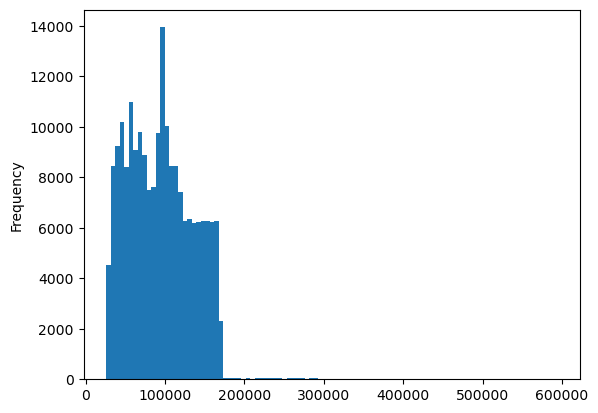

In [13]:
# plot histogram of user income
hist = df_custs["income"].plot.hist(bins=100)

There appears to be a notable decline in income at a specific value.

In [14]:
# determine where the drop occurs
values, bins, _ = hist.axes.hist(df_custs["income"], bins=1000)
[(f"{bin:6.0f}, {val:6.0f}") for bin, val in zip(bins, values)]

[' 25903,     81',
 ' 26471,     73',
 ' 27039,    221',
 ' 27607,    360',
 ' 28175,    358',
 ' 28743,    457',
 ' 29311,    448',
 ' 29879,    803',
 ' 30447,    830',
 ' 31015,    897',
 ' 31583,    840',
 ' 32151,    853',
 ' 32719,    873',
 ' 33287,    818',
 ' 33855,    857',
 ' 34423,    835',
 ' 34991,    786',
 ' 35559,    881',
 ' 36127,    844',
 ' 36695,    845',
 ' 37263,    864',
 ' 37831,    841',
 ' 38399,    850',
 ' 38967,    898',
 ' 39535,    914',
 ' 40103,    903',
 ' 40671,    895',
 ' 41239,    956',
 ' 41807,   1047',
 ' 42375,   1052',
 ' 42943,   1030',
 ' 43511,   1147',
 ' 44079,   1154',
 ' 44647,   1041',
 ' 45215,    940',
 ' 45783,    987',
 ' 46351,    947',
 ' 46919,    974',
 ' 47487,    986',
 ' 48055,   1001',
 ' 48623,    723',
 ' 49191,    700',
 ' 49759,    627',
 ' 50327,    566',
 ' 50895,    570',
 ' 51463,    748',
 ' 52031,   1143',
 ' 52599,   1069',
 ' 53167,   1096',
 ' 53735,   1154',
 ' 54303,   1085',
 ' 54871,   1084',
 ' 55439,   

>There are very few income counts **above 170k**. These values seem to be false. As long as there is no >clear way how to correct the values, they should be dropped.<br>
>In order not to drop complete observations, that values are **changed to NaN** values.

In [15]:
# change seemingly false income values to nan
df_custs.loc[df_custs["income"]>170000, "income"] = np.nan

## Data Privacy - Customer Data

First and last names are not need for the analysis and should be dropped [#](#table-of-content)

In [16]:
df_custs = df_custs.drop(columns=["First Name", "Surnam"])

## Merge Data Sets [#](#table-of-content)

Inspect shapes

In [17]:
df_ords_prods.shape

(32404859, 22)

In [18]:
df_custs.shape

(206209, 8)

Find common columns

In [19]:
set(df_ords_prods.columns) & set(df_custs.columns)

{'user_id'}

Merge on user_id

In [20]:
df_ords_prods_custs = df_ords_prods.merge(df_custs)
df_ords_prods_custs

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_days_since_prior_order,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329.0,1.0,1.0,2.0,8.0,0.0,196.0,1.0,0.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399727,156685.0,106143.0,26.0,4.0,23.0,5.0,19675.0,1.0,1.0,Organic Raspberry Black Tea,...,High spender,6.5,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755.0
32399728,484769.0,66343.0,1.0,6.0,11.0,0.0,47210.0,1.0,0.0,Fresh Farmed Tilapia Fillet,...,Low spender,24.5,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151.0
32399729,1561557.0,66343.0,2.0,1.0,11.0,30.0,47210.0,1.0,1.0,Fresh Farmed Tilapia Fillet,...,Low spender,24.5,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151.0
32399730,276317.0,66343.0,3.0,6.0,15.0,19.0,47210.0,1.0,1.0,Fresh Farmed Tilapia Fillet,...,Low spender,24.5,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151.0


In [21]:
# check merge quality
df_ords_prods.merge(df_custs, how="outer", indicator=True)["_merge"].value_counts()

both          32399732
left_only         5127
right_only           0
Name: _merge, dtype: int64

## Export [#](#table-of-content)

In [22]:
df_ords_prods_custs.to_pickle(orders_products_customers_merged_data_file)

In [23]:
df_ords_prods_custs.shape

(32399732, 29)